# GEDA
Lau
***

In [9]:
# librerias
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
# importamos datos con cambios de EDA
df = pd.read_csv('data_consumo_agua.csv')

In [3]:
df.head()

,consumo_total_mixto,anio,nomgeo,consumo_prom_dom,consumo_total_dom,alcaldia,colonia,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,bimestre,consumo_total_no_dom,gid,indice_des,latitud,longitud
0,159.72,2019,Gustavo A. Madero,42.566364,468.23,gustavo a. madero,7 de noviembre,53.24,631.00,42.066667,3.05,3,3.05,57250,alto,19.455260,-99.112662
1,0.00,2019,Gustavo A. Madero,35.936667,107.81,gustavo a. madero,7 de noviembre,0.00,115.13,28.782500,7.32,3,7.32,57253,medio,19.455260,-99.112662
2,0.00,2019,Gustavo A. Madero,24.586000,122.93,gustavo a. madero,7 de noviembre,0.00,197.96,32.993333,75.03,3,75.03,57255,popular,19.455720,-99.113582
3,0.00,2019,Gustavo A. Madero,0.000000,0.00,gustavo a. madero,nueva tenochtitlan,0.00,253.53,84.510000,84.51,3,253.53,57267,bajo,19.459647,-99.104469
4,56.72,2019,Azcapotzalco,67.436250,539.49,azcapotzalco,prohogar,56.72,839.35,76.304545,121.57,3,243.14,57330,bajo,19.474161,-99.146750


## Preguntas y Observaciones

### Sobre posibles errores en la transferencia de datos

 Notemos que en Iztapalapa es notablemente mayor al resto de las alcaldías el número de registros con cero consumo total de agua:

In [26]:
df[df.consumo_total == 0].groupby(['alcaldia'], as_index=False)['gid']\
                        .count()\
                        .rename(columns={'gid': 'cero_consumo_total'})

,alcaldia,cero_consumo_total
0,alvaro obregon,55
1,azcapotzalco,25
2,benito juarez,34
3,coyoacan,136
4,cuajimalpa,37
5,cuauhtemoc,28
6,gustavo a. madero,159
7,iztacalco,22
8,iztapalapa,1119
9,magdalena contreras,115


 Esto podría representar un error en la transferencia de datos, o bien, podría ser un comportamiento normal para esta alcaldía, por ello consideramos importante comentar esto con negocio.

In [41]:
df[df.consumo_total == 0].groupby(['alcaldia'], as_index=False)\
                        .agg({'consumo_total_mixto': 'count',
                              'consumo_total_dom': 'count',
                              'consumo_total_no_dom': 'count'})

,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom
0,alvaro obregon,32,32,55
1,azcapotzalco,17,17,25
2,benito juarez,23,23,34
3,coyoacan,86,86,136
4,cuajimalpa,24,24,37
5,cuauhtemoc,19,19,28
6,gustavo a. madero,103,103,159
7,iztacalco,15,15,22
8,iztapalapa,750,748,1119
9,magdalena contreras,75,75,115


 En particular, Iztapalapa consume mucha agua en entidades no domiciliadas.

### Variables categóricas

### Información por alcaldía

/home/ltejadal/.pyenv/versions/itam_intro_to_ds/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0, 'gustavo a. madero'),
 Text(1, 0, 'azcapotzalco'),
 Text(2, 0, 'coyoacan'),
 Text(3, 0, 'tlalpan'),
 Text(4, 0, 'milpa alta'),
 Text(5, 0, 'alvaro obregon'),
 Text(6, 0, 'cuajimalpa'),
 Text(7, 0, 'tlahuac'),
 Text(8, 0, 'magdalena contreras'),
 Text(9, 0, 'xochimilco'),
 Text(10, 0, 'iztapalapa'),
 Text(11, 0, 'iztacalco'),
 Text(12, 0, 'benito juarez'),
 Text(13, 0, 'miguel hidalgo'),
 Text(14, 0, 'cuauhtemoc'),
 Text(15, 0, 'venustiano carranza')]

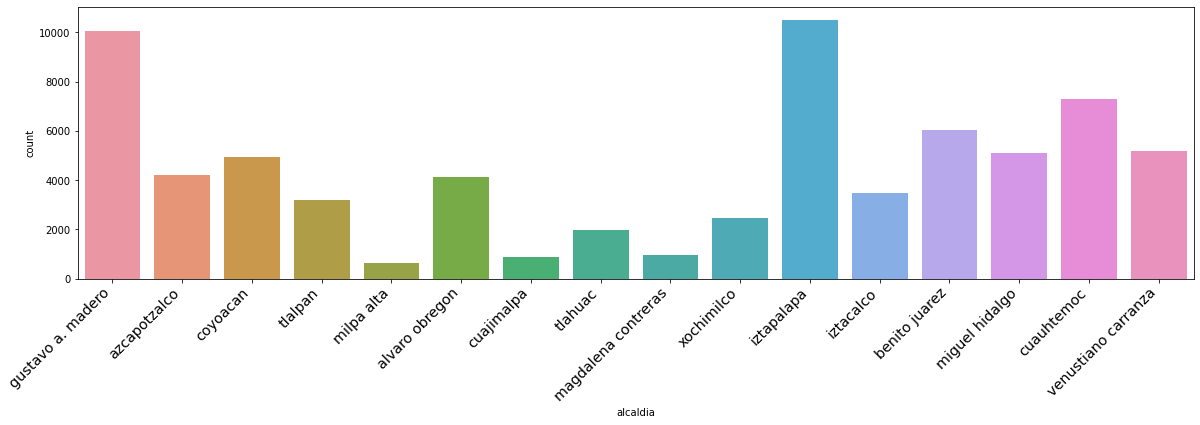

In [64]:
plt.figure(figsize=(20,5))
chart = sns.countplot(df['alcaldia'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize='x-large')

## Preguntas

¿Hay algún bimestre o alguna alcaldía para la que tengamos más/menos información? ¿la proporción de la información coincide con el tamaño de la alcaldía? Esto es para identificar si nos faltaron datos y checar si la muestra está desbalanceada.

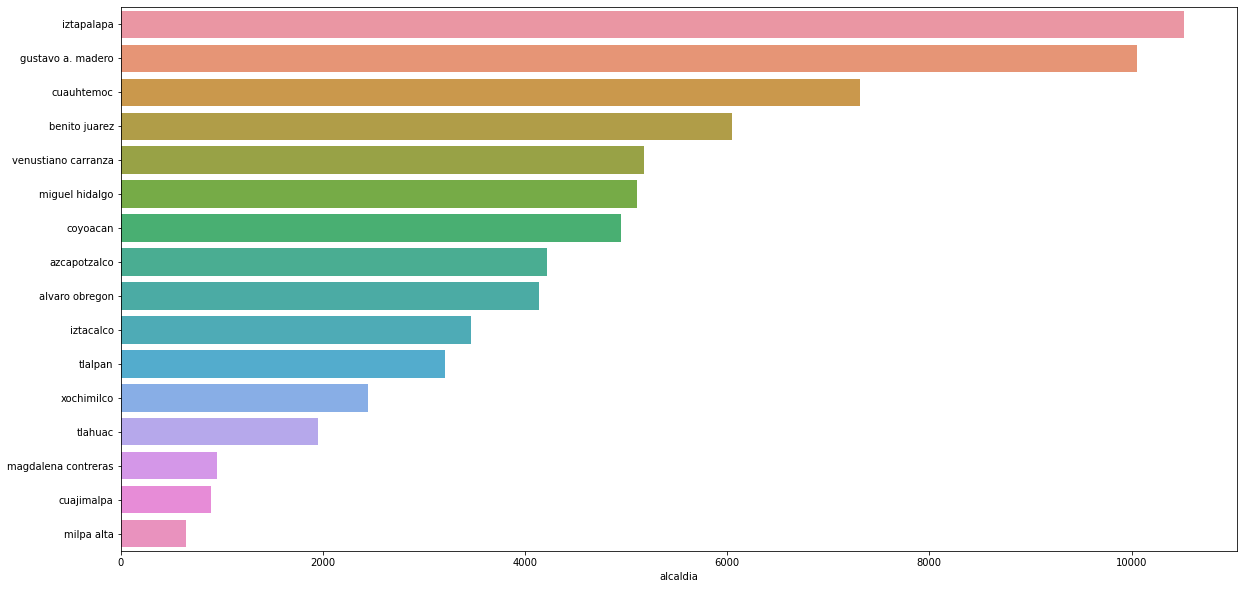

In [6]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=df.alcaldia.value_counts(), y=df.alcaldia.value_counts().index, data=df)

 Tenemos notablemente más información en Iztapalaba y Gustavo A. Madero, mientras que de las alcaldías en que tenemos menos información son la Magdalena Contreras, Cuajimalpa y Milpa Alta. De entrada vemos que un modelo que considere a las alcaldías (y muy probablemente así sea) en sus entradas estará desbalanceado.
 Tomando esto en cuenta valdrá la pena preguntarnos si estas cifras hacen sentido con la cantidad de entidades existentes en cada una de las alcaldías, para identificar si la las proporcioenes en la muestra son erróneas. Adicionalmente nos interesará saber si la cantidad de valores faltantes en el consumo de agua es proporcional a al volumen de alcaldías, o si nos falta información para alguna de estas (o en algún bimestre en particular) 

## ¿Cómo es el índice de desarrollo en cada alcaldía? ¿Hay alguna para la que el índice de desarrollo sea mayor? ¿cómo cambia esta cantidad por bimestre?

In [212]:
# aún no lo he hecho hehehe

## Análisis de valores faltantes.

In [210]:
df_missing_values = df.groupby(['bimestre', 'alcaldia'])\
                            .agg({'consumo_total_mixto': lambda x: x.isnull().sum(),
                           'consumo_total_dom': lambda x: x.isnull().sum(),
                           'consumo_total_no_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_mixto': lambda x: x.isnull().sum(),
                           'consumo_prom_dom': lambda x: x.isnull().sum(),
                           'consumo_prom_no_dom': lambda x: x.isnull().sum()})\
                            .reset_index()
df_missing_values.head()

,bimestre,alcaldia,consumo_total_mixto,consumo_total_dom,consumo_total_no_dom,consumo_prom_mixto,consumo_prom_dom,consumo_prom_no_dom
0,1,alvaro obregon,620.0,196.0,0.0,620.0,196.0,0.0
1,1,azcapotzalco,295.0,172.0,0.0,295.0,172.0,0.0
2,1,benito juarez,455.0,109.0,0.0,455.0,109.0,0.0
3,1,coyoacan,882.0,430.0,0.0,882.0,430.0,0.0
4,1,cuajimalpa,146.0,57.0,0.0,146.0,57.0,0.0


 Lo primero que notamos es que todos los valores faltantes son en las variables numéricas, y que además todas ellas corresponden al primer bimestre del año, por lo que valdrá la pena comentar con negocio e investigar por qué únicamente en estas fechas nos falta información.

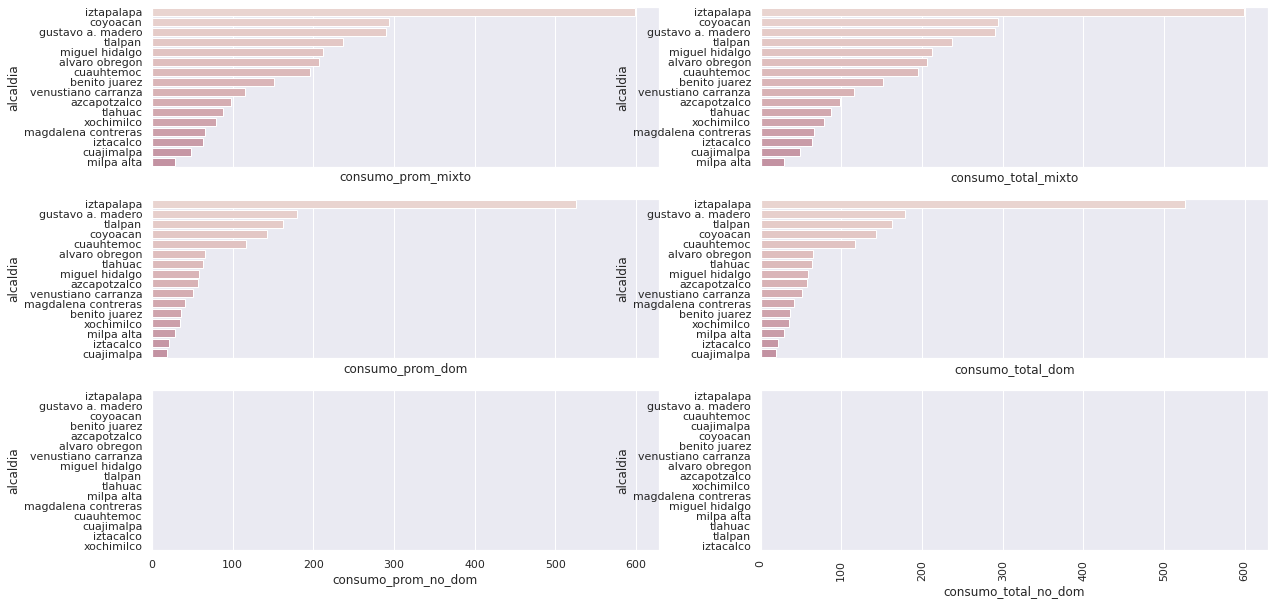

In [211]:
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))


df_missing_values = df_missing_values.sort_values('consumo_prom_mixto', ascending=False)
sns.barplot(ax=axes[0,0], x=df_missing_values['consumo_prom_mixto'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_prom_dom', ascending=False)
sns.barplot(ax=axes[1,0], x=df_missing_values['consumo_prom_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_prom_no_dom', ascending=False)
sns.barplot(ax=axes[2,0], x=df_missing_values['consumo_prom_no_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)

df_missing_values = df_missing_values.sort_values('consumo_total_mixto', ascending=False)
sns.barplot(ax=axes[0,1], x=df_missing_values['consumo_total_mixto'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_total_dom', ascending=False)
sns.barplot(ax=axes[1,1], x=df_missing_values['consumo_total_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)
df_missing_values = df_missing_values.sort_values('consumo_total_no_dom', ascending=False)
sns.barplot(ax=axes[2,1], x=df_missing_values['consumo_total_no_dom'], y=df_missing_values['alcaldia'],
                 palette=sns.cubehelix_palette(len(df_missing_values['alcaldia'])), ci=0)



plt.xticks(rotation= 90)
#plt.xlabel('Alcaldía')
#plt.ylabel('Valores Faltantes')
#plt.title('Valores Faltantes de Consumo Promedio Domiciliado en Bimestre 1')
plt.show()

Estas gráficas representan el número de valores faltantes para cada una de las alcaldías. Todos son en el primer bimestre (no hay NAs en los bimestres 2 y 3). Sólo hay valores faltantes para los domiciliados y mixtos, pero en los no domiciliados no hay valores faltantes. Además, los valores faltantes parecen ser más o menos proporcionales a la cantidad de registros que tenemos por alcaldía, por lo que no parece algo preocupante para el proyecto; sin embargo, sí tendríamos que hablar con negocio sobre la significativa falta de información en el primer bimestre.